Universidad del Valle de Guatemala <br>
25/04/2022 <br>
Minería de Datos

# Hoja de Trabajo
## RNA

**Integrantes:**<br>
Eduardo Ramírez 19946 <br>
Andres Paiz 19 <br>
Rene Ventura 19 <br>

### Importar modulos

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
import random
import math
import time
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn import datasets
from scipy import stats
from sklearn.metrics import confusion_matrix as Confusion_Matrix
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.neural_network import MLPClassifier, MLPRegressor

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

### Carga de datos

In [2]:
entrenamiento = pd.read_csv('train.csv', encoding='unicode_escape')
prueba = pd.read_csv('test.csv', encoding='unicode_escape')

### Preprocesamiento

Remover variables cualitativas que no aportan, ya que no son categóricas, y sus frecuencias no pueden ser clasificadas.

In [3]:
entrenamiento = entrenamiento.drop(['Street', 'Id', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                         'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle','RoofStyle', 
                         'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
                         'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                         'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
                         'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive','PoolQC', 'Fence', 'MiscFeature', 
                         'SaleType', 'SaleCondition'], axis=1)

Eliminar filas que contengan datos nulos (NaN).

In [4]:
entrenamiento.dropna(subset = ["LotFrontage"], inplace = True)
entrenamiento.dropna(subset = ["MasVnrArea"], inplace = True)
entrenamiento.dropna(subset = ["GarageYrBlt"], inplace = True)

Normalizacion

In [5]:
def normalizer(column):
    return (column - column.mean())/(column.std())

for col in entrenamiento.columns:
    entrenamiento[col] = normalizer(entrenamiento[col])

Eliminacion de datos atipicos

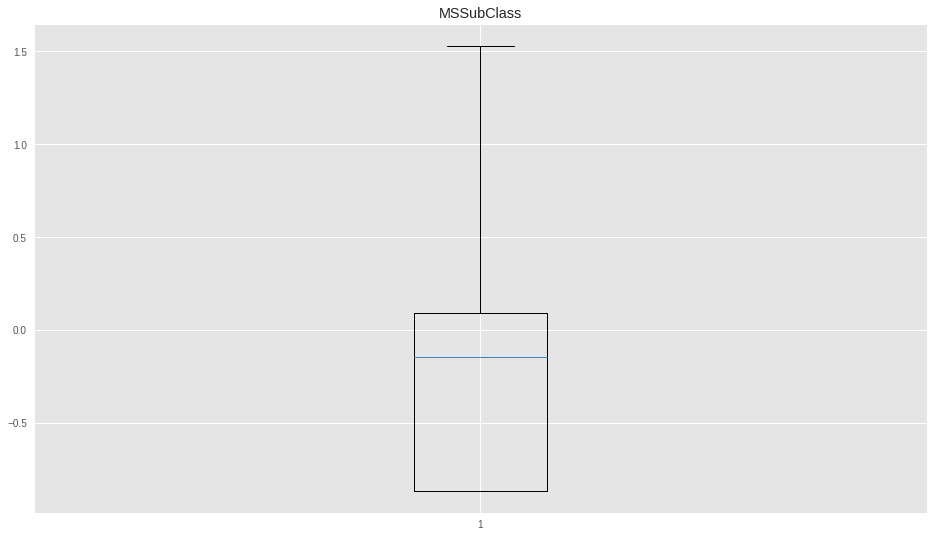

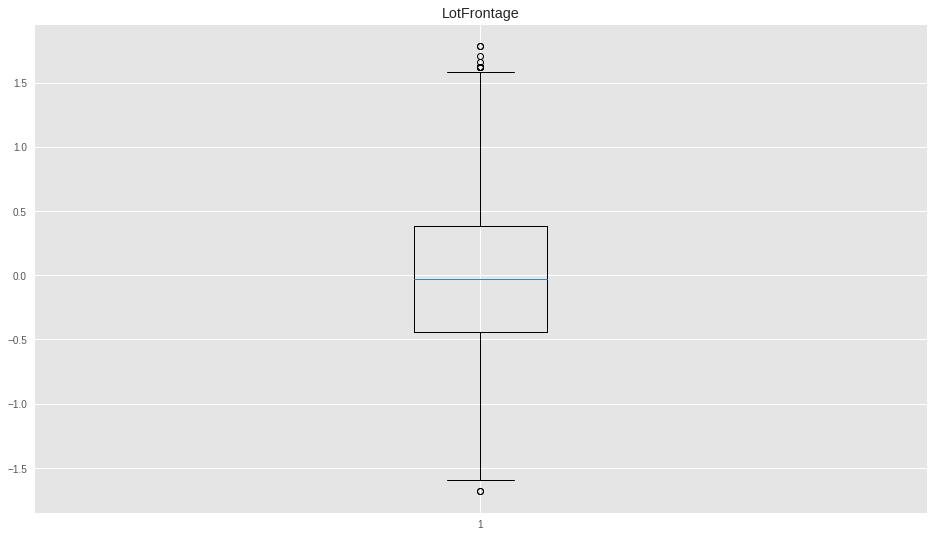

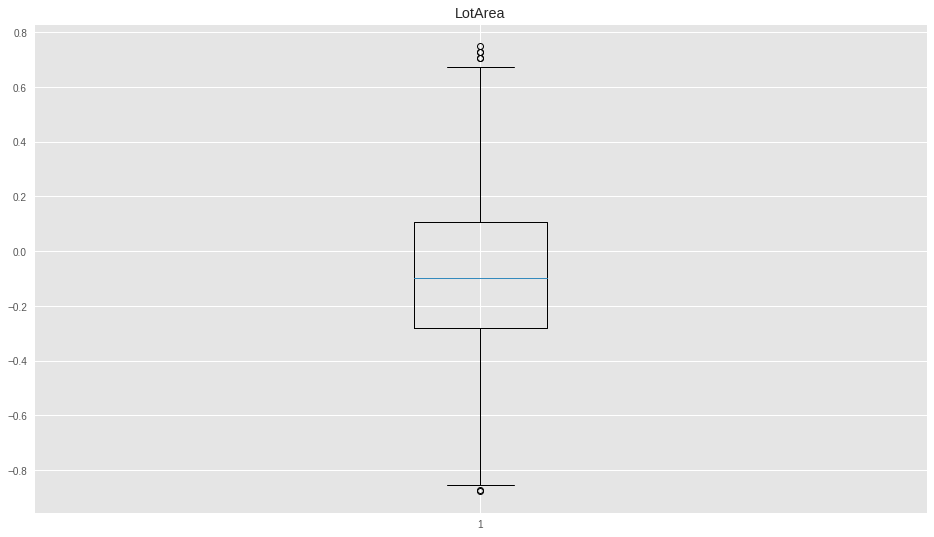

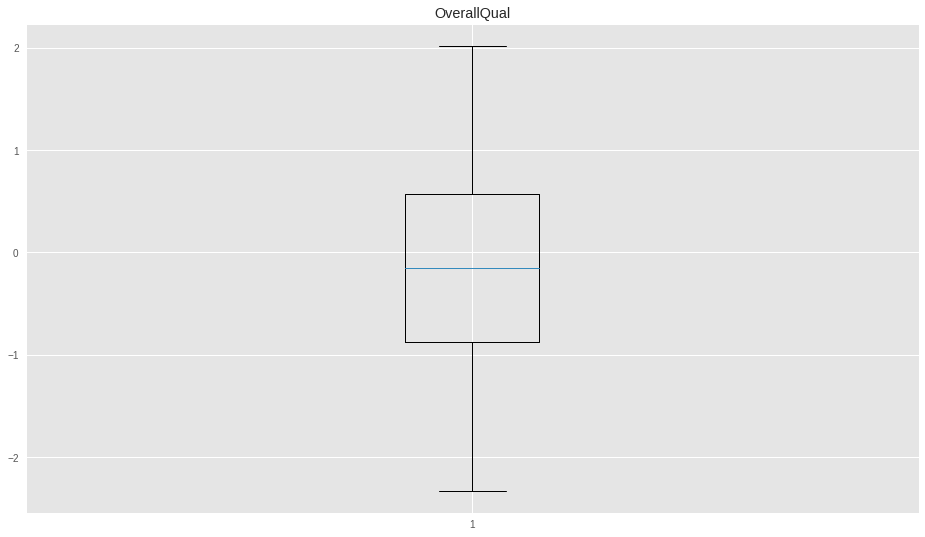

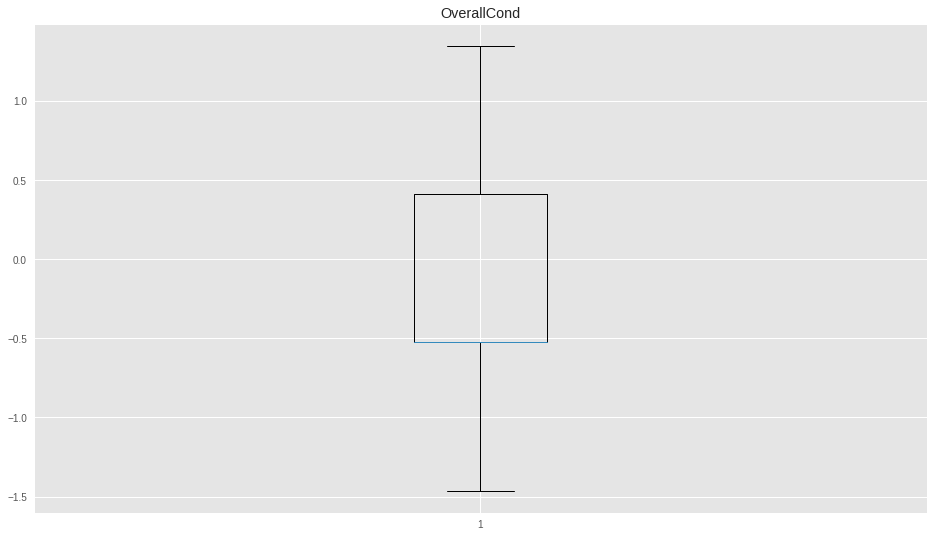

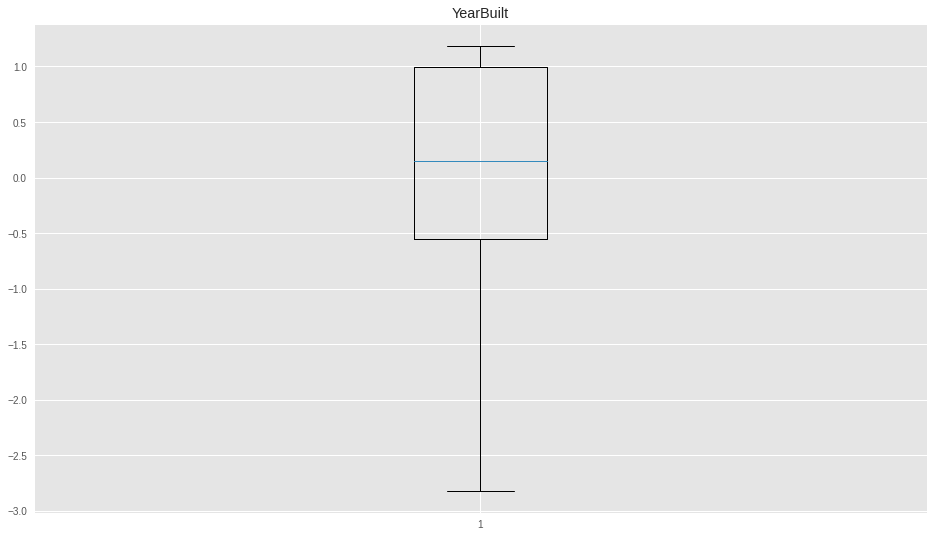

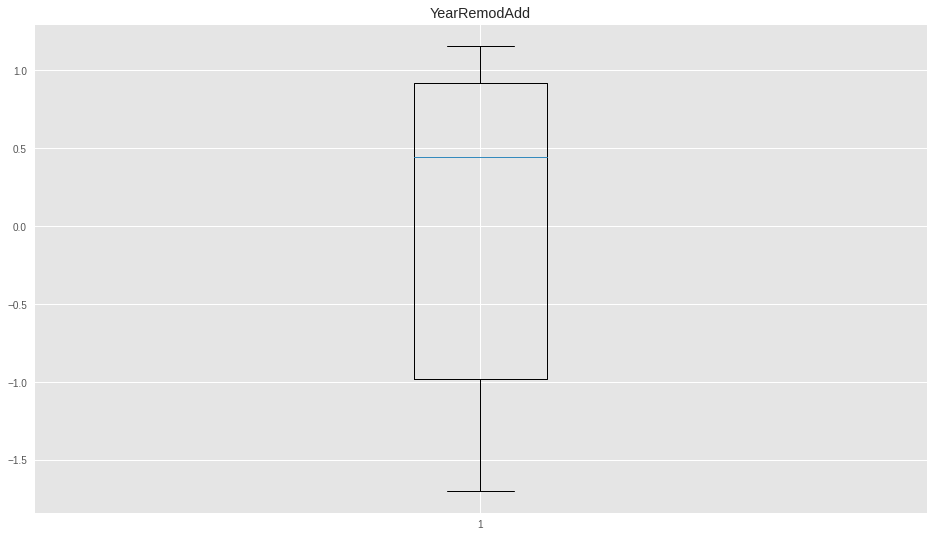

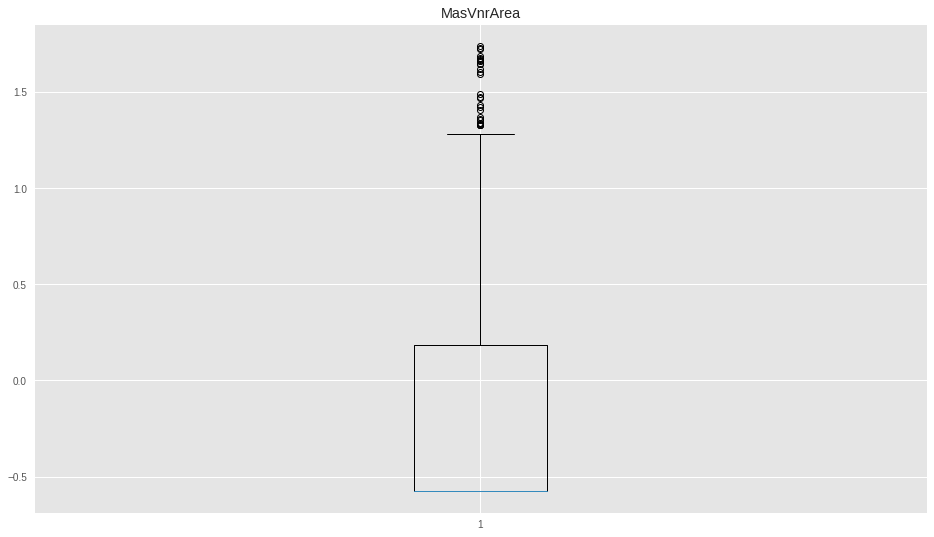

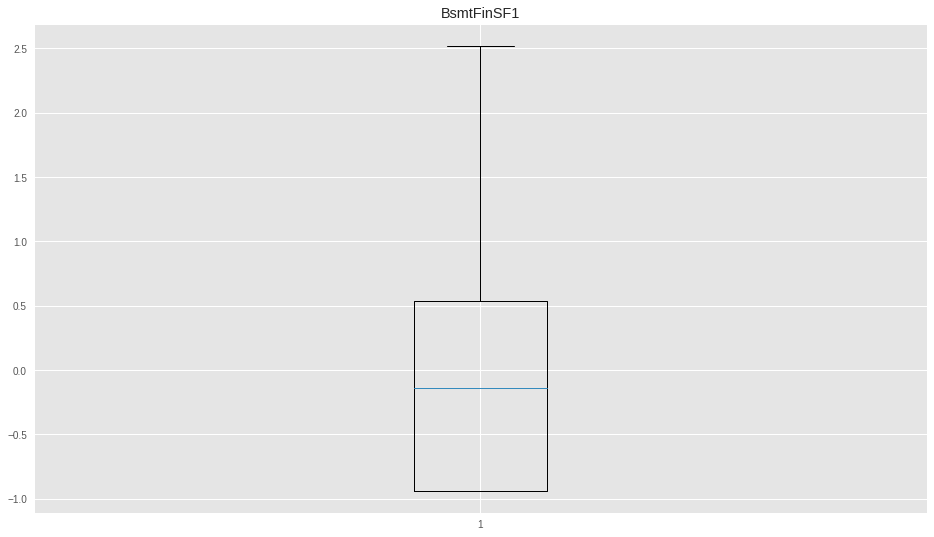

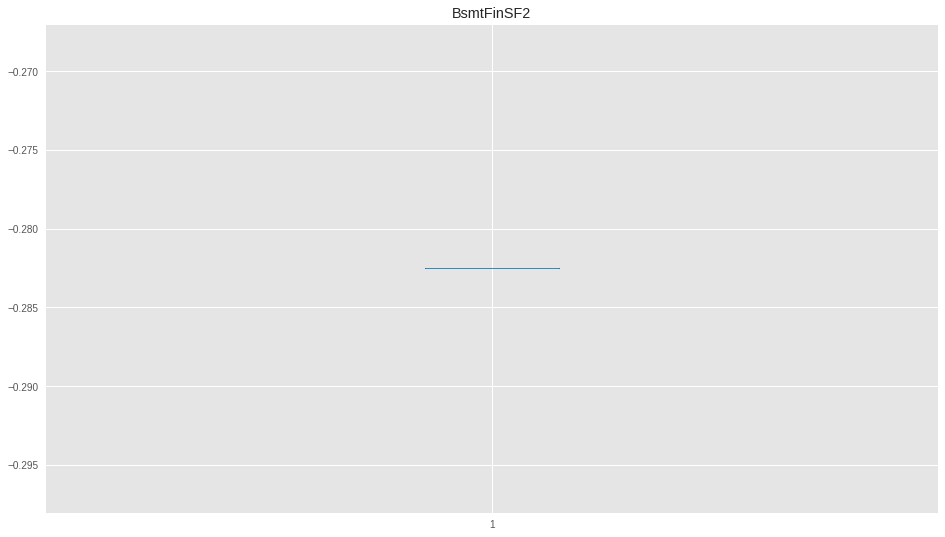

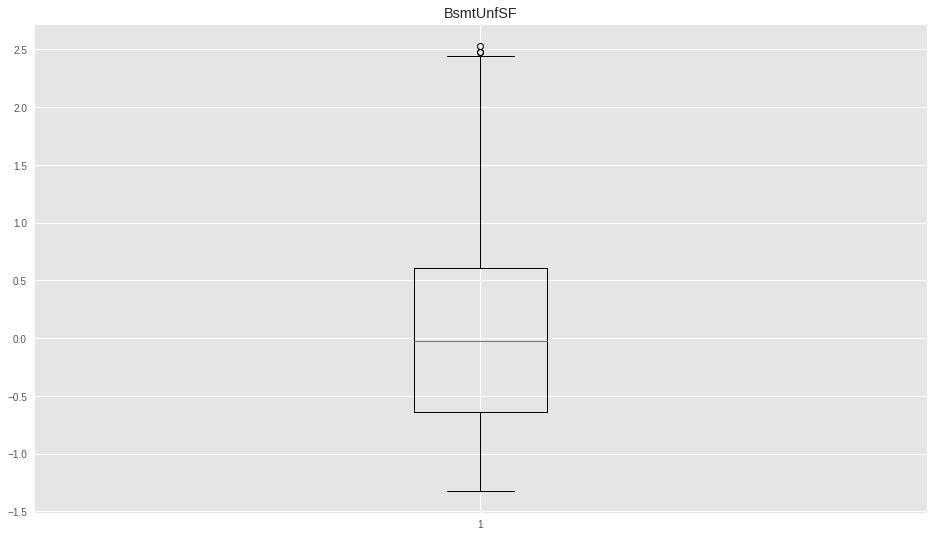

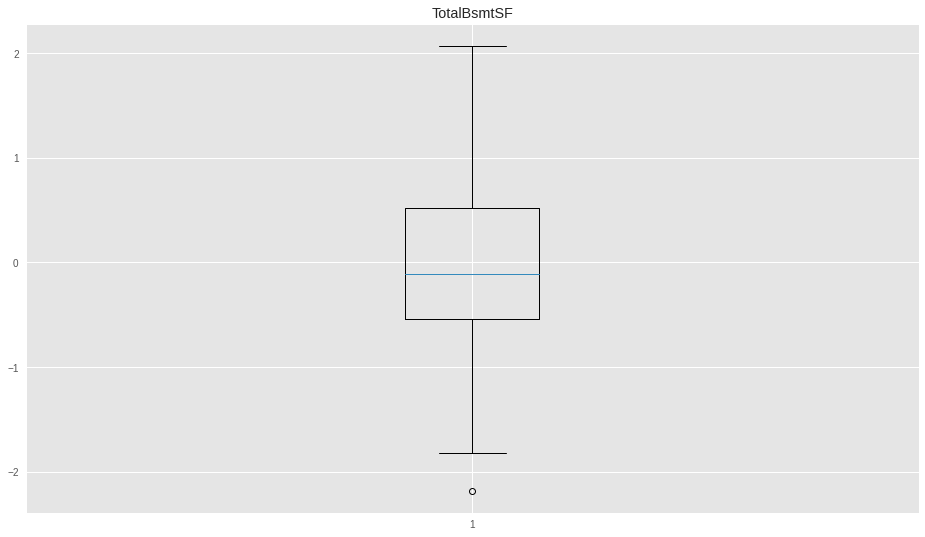

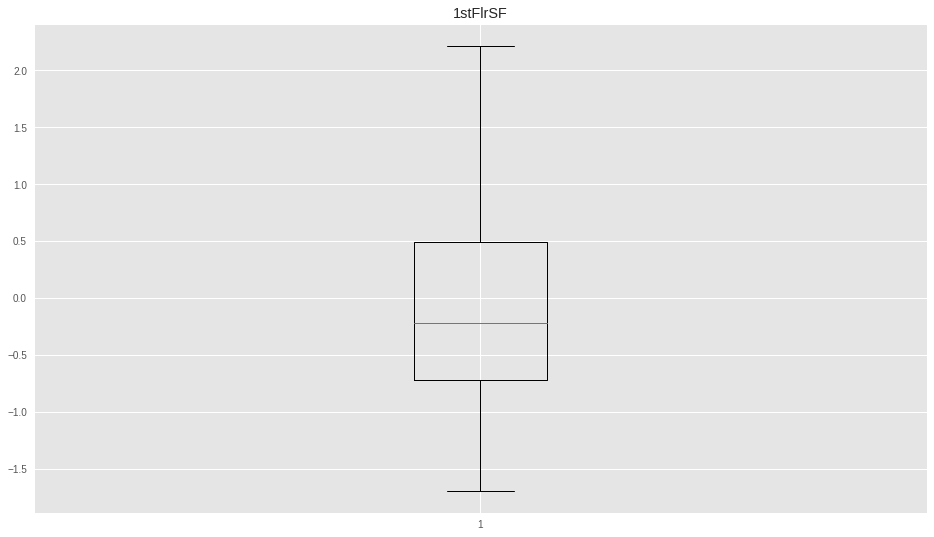

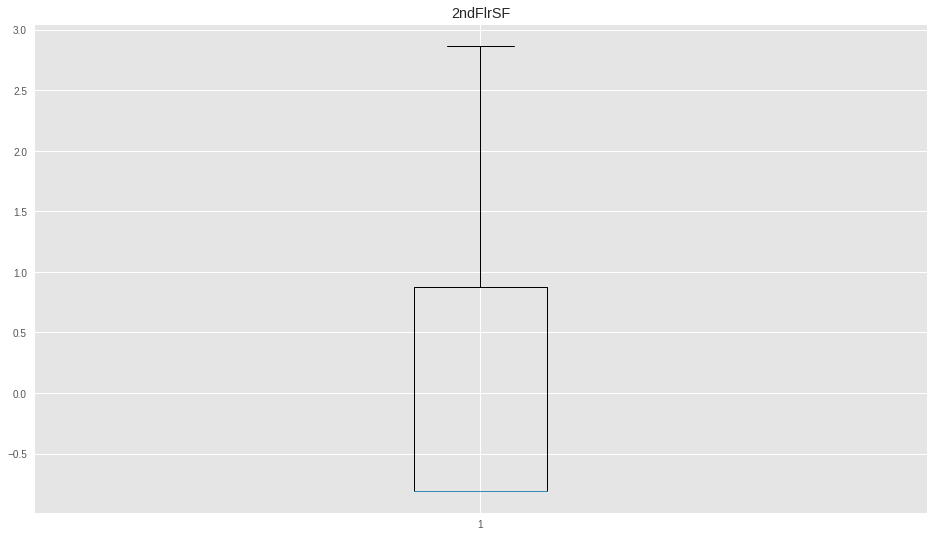

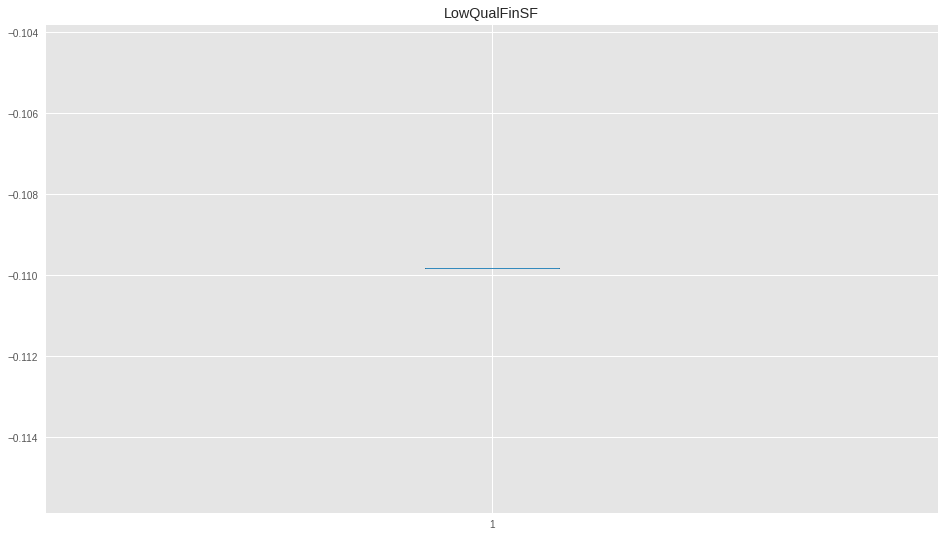

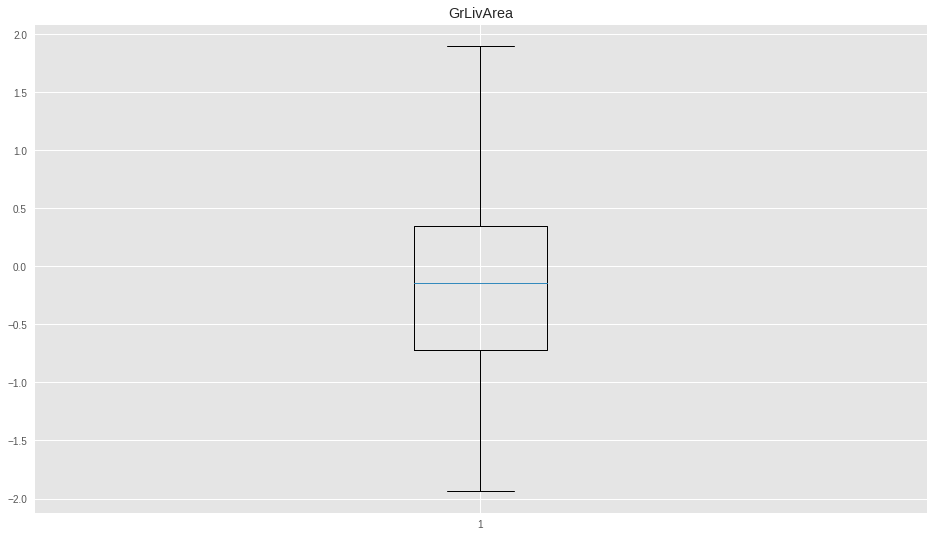

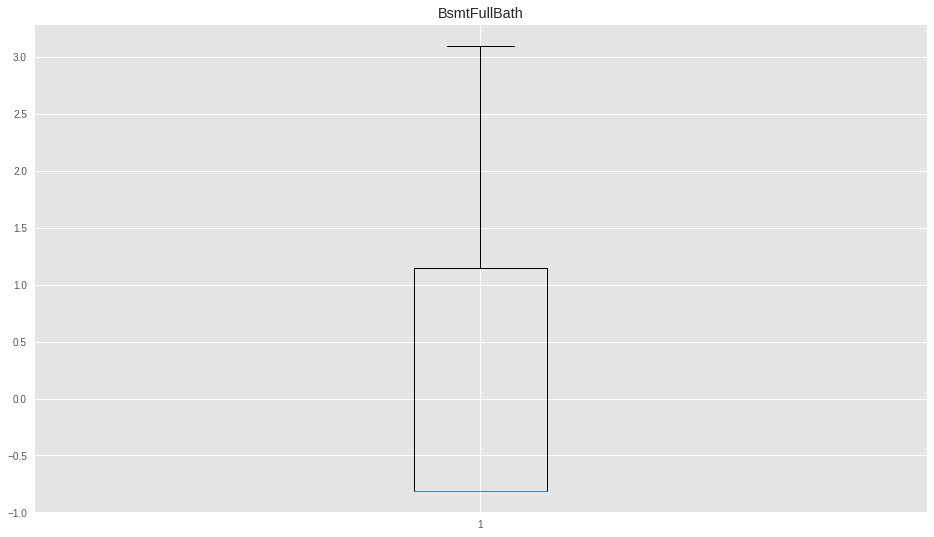

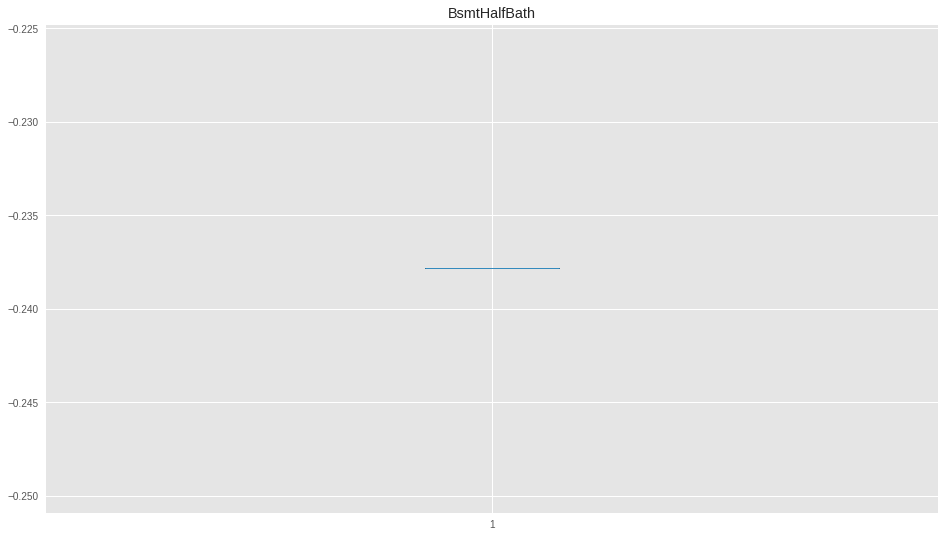

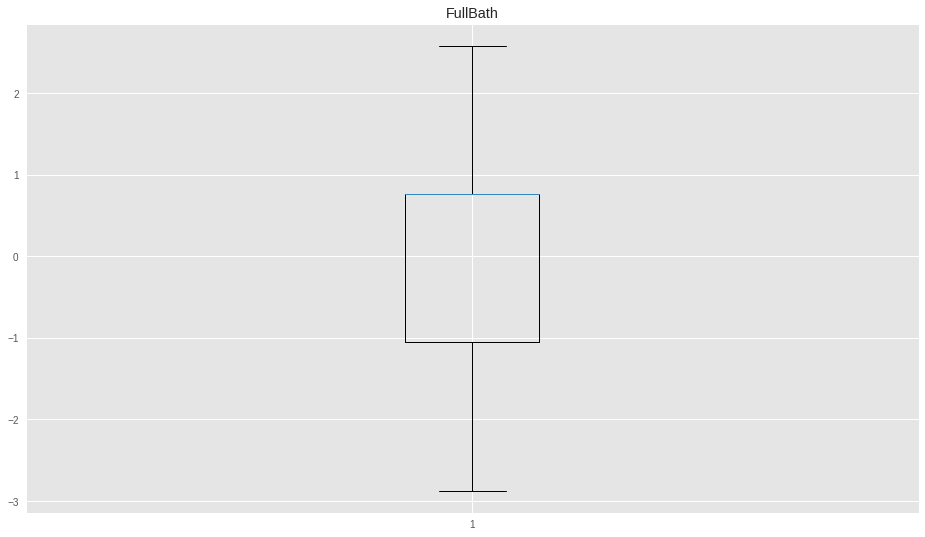

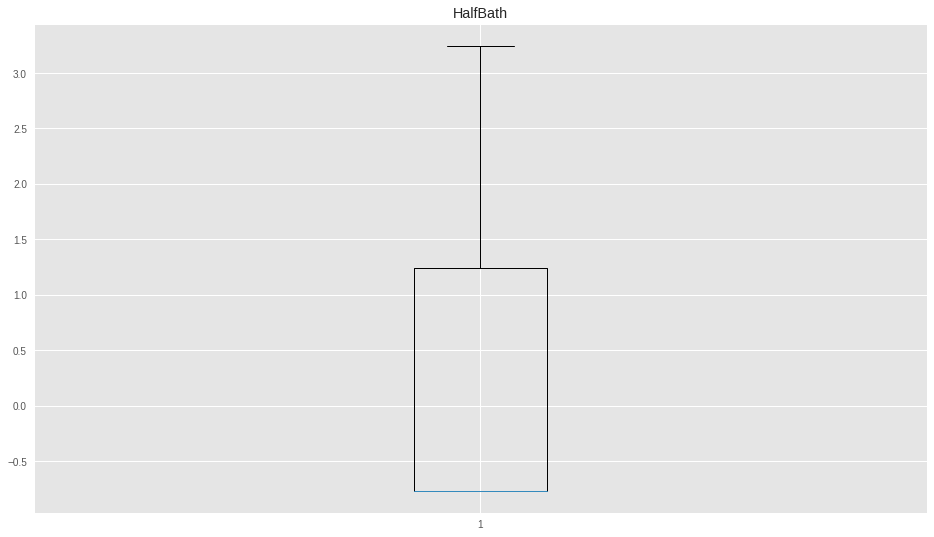

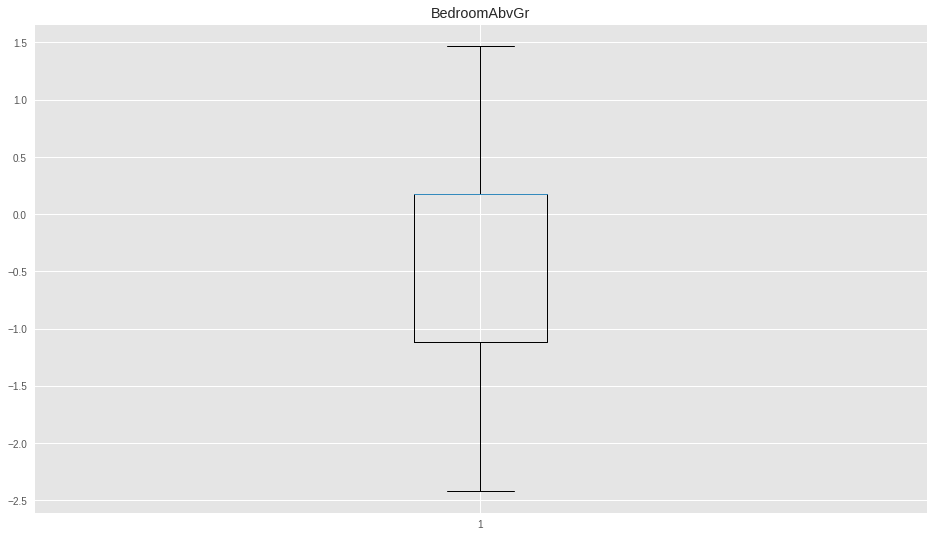

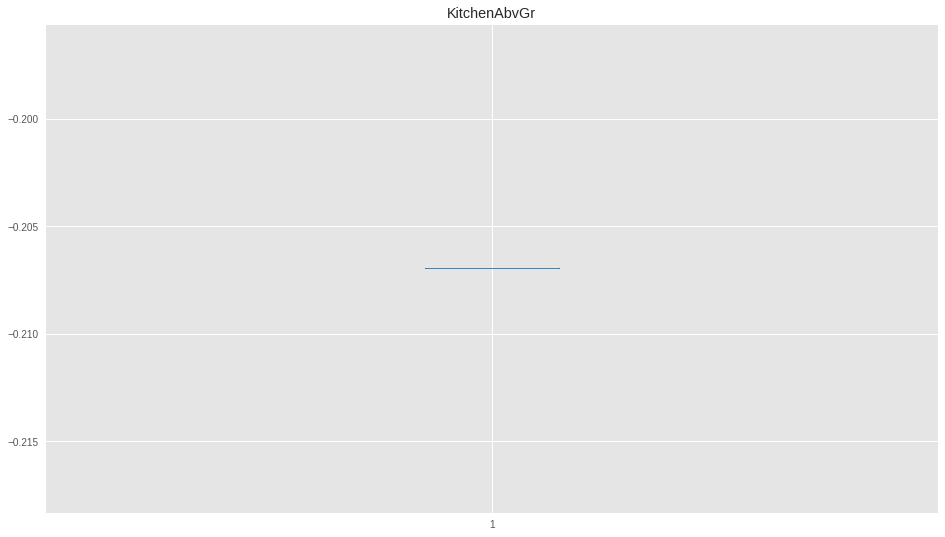

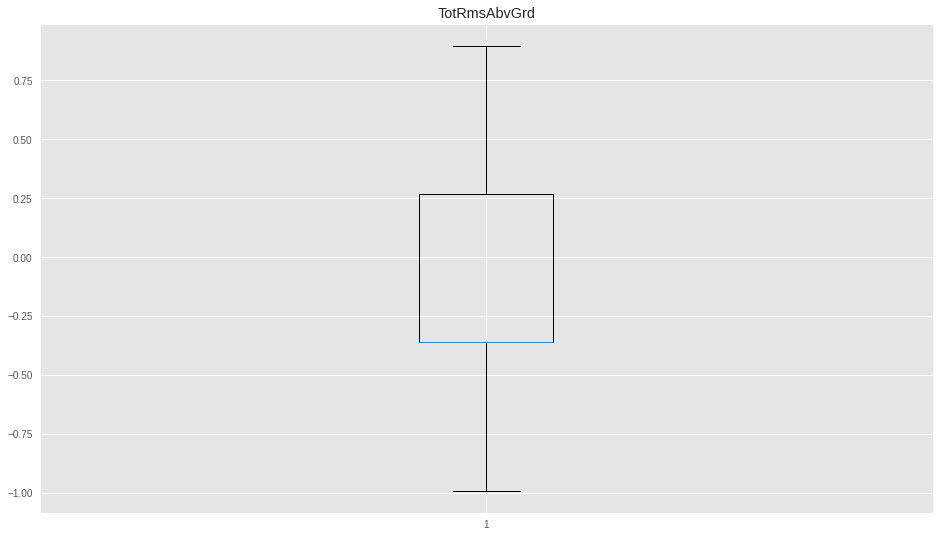

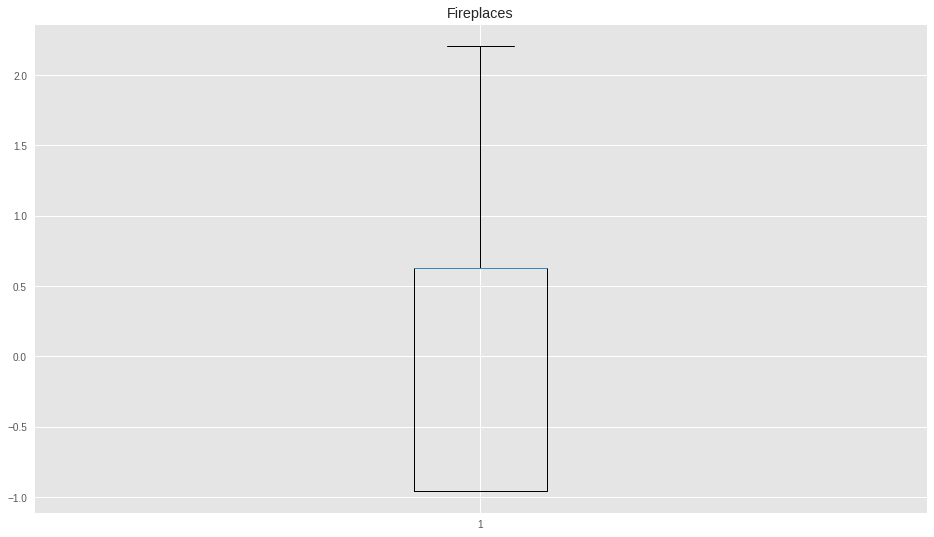

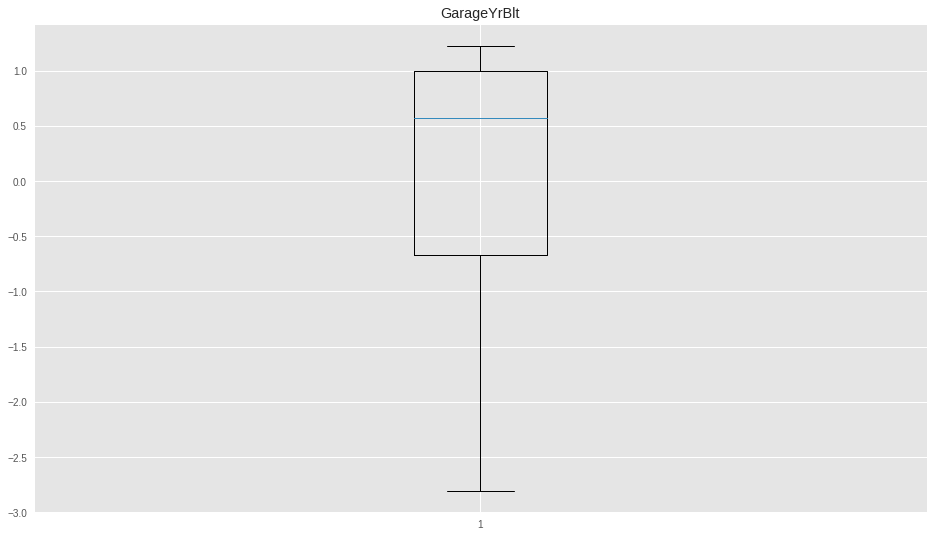

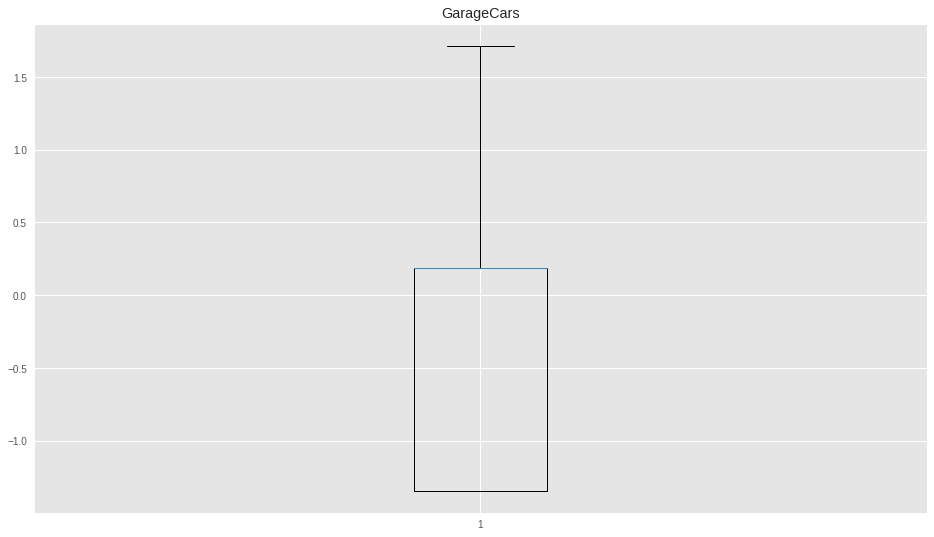

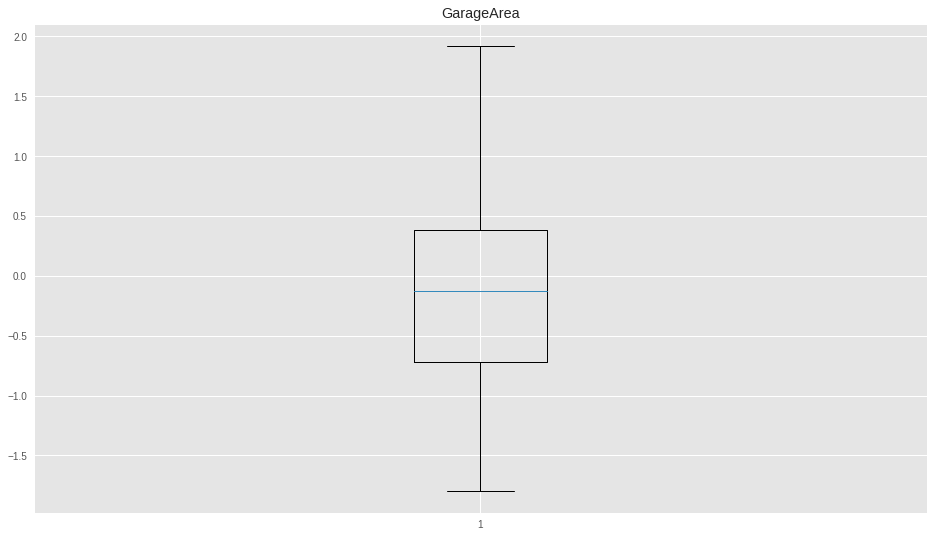

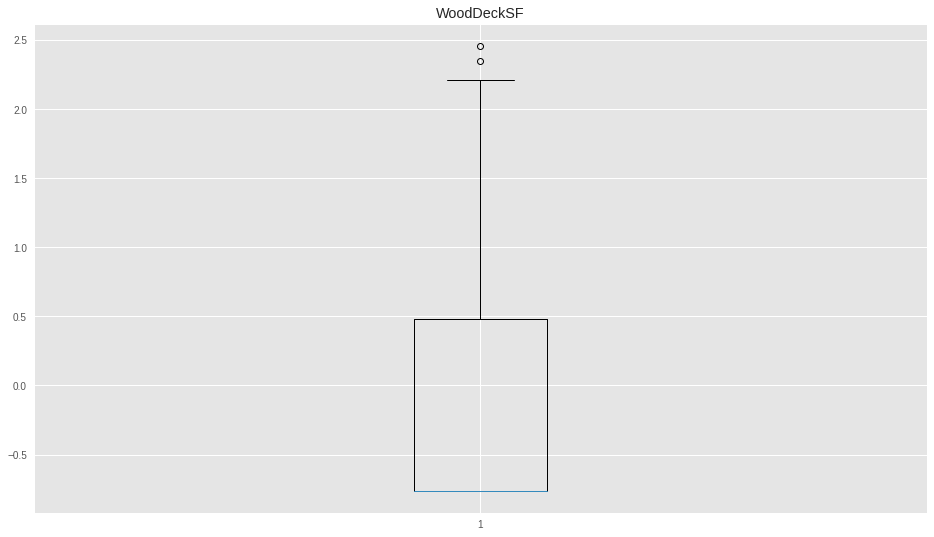

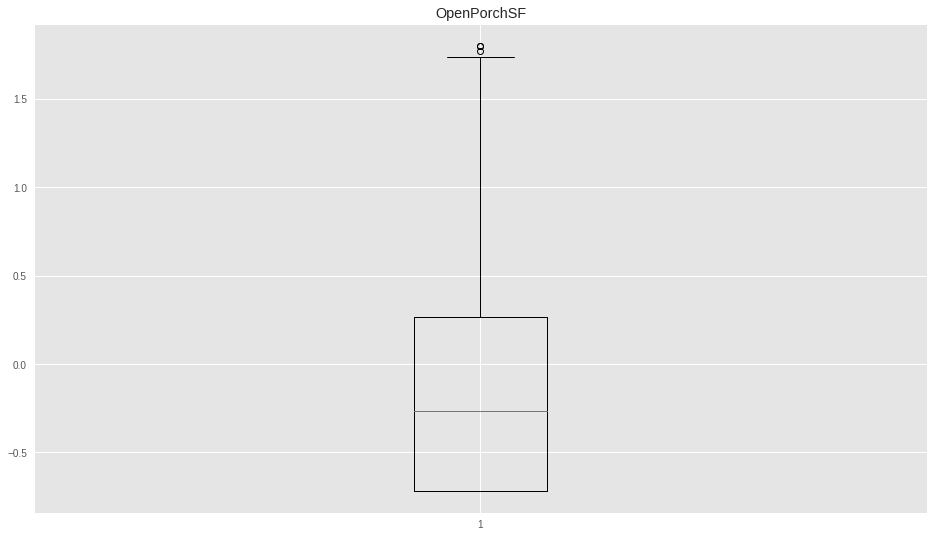

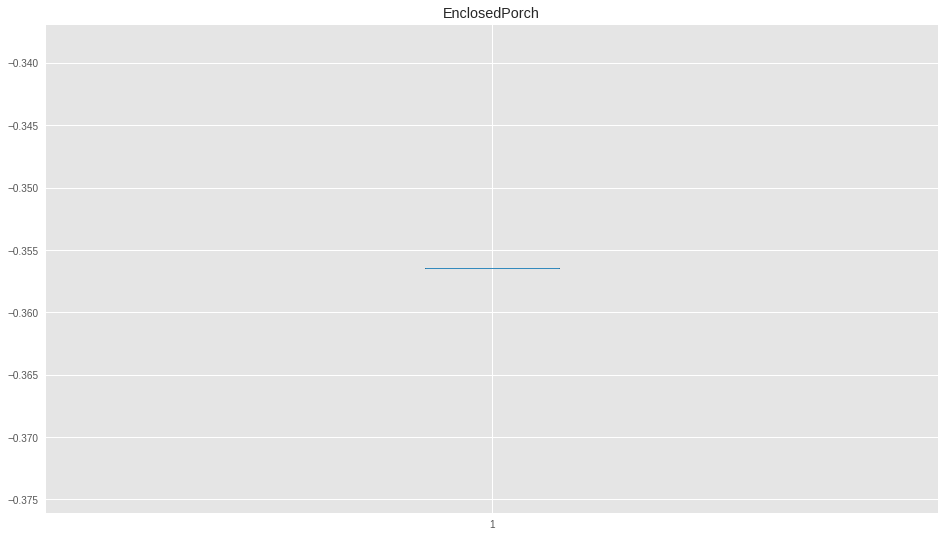

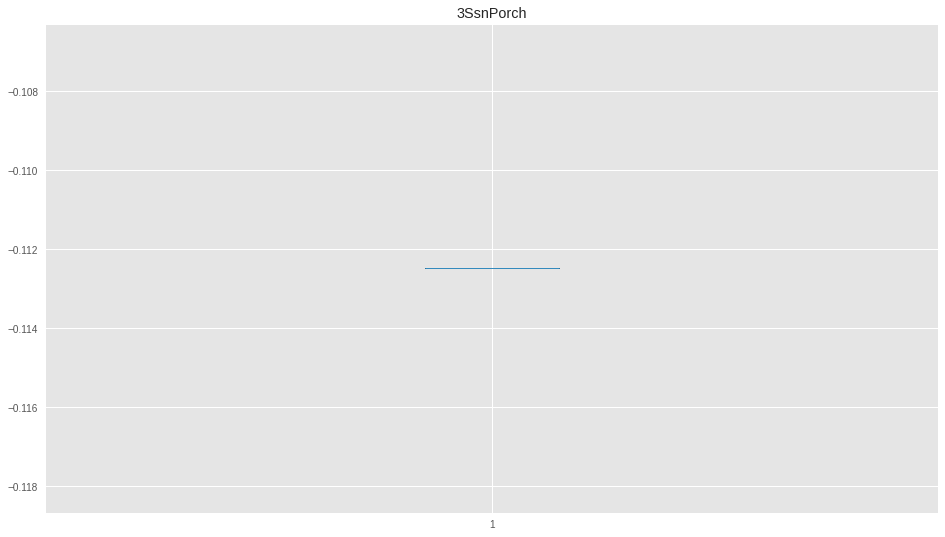

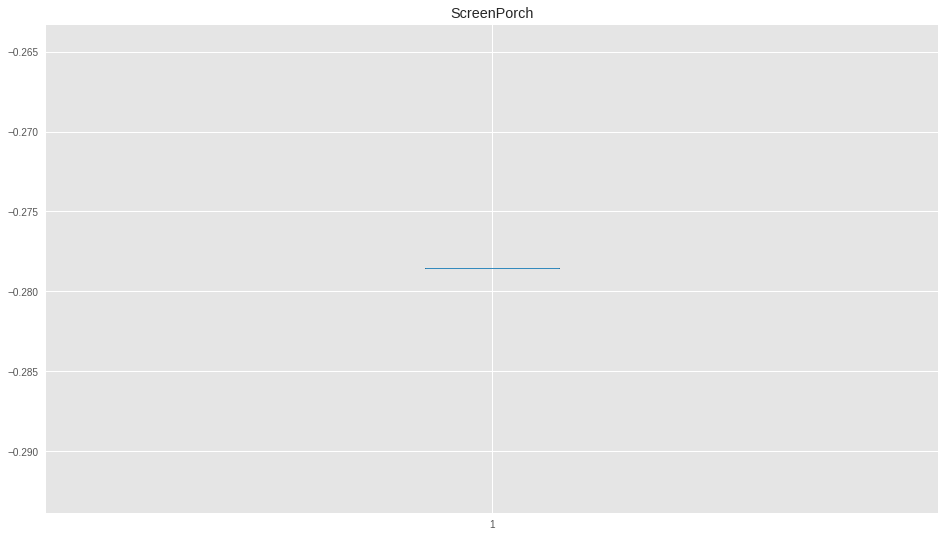

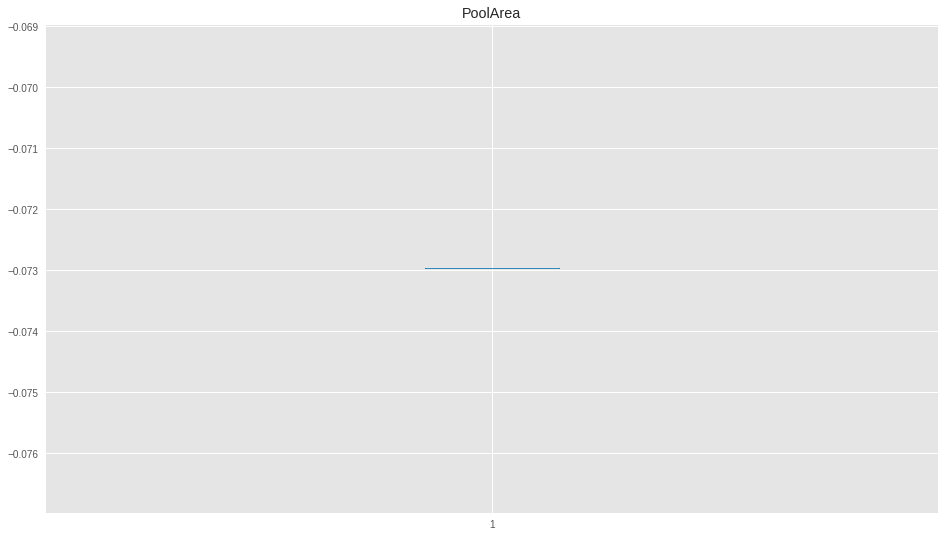

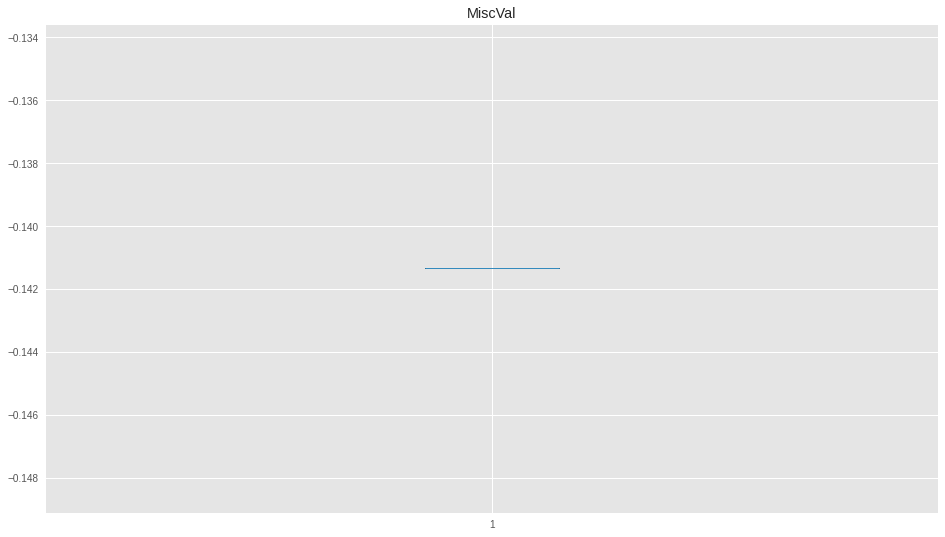

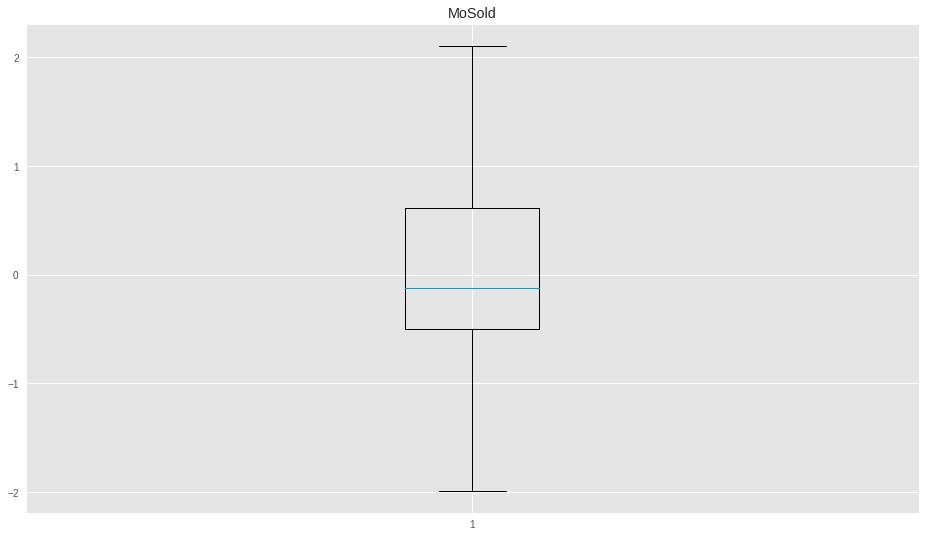

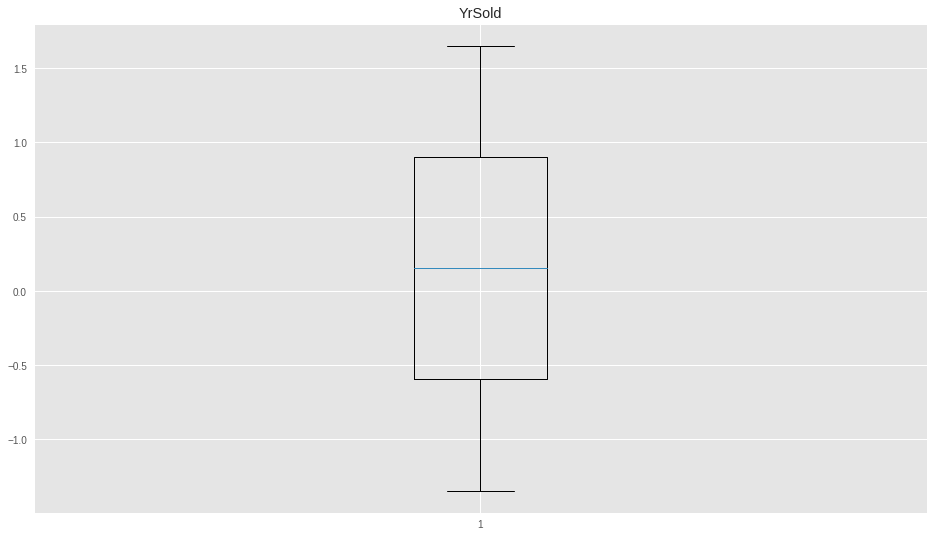

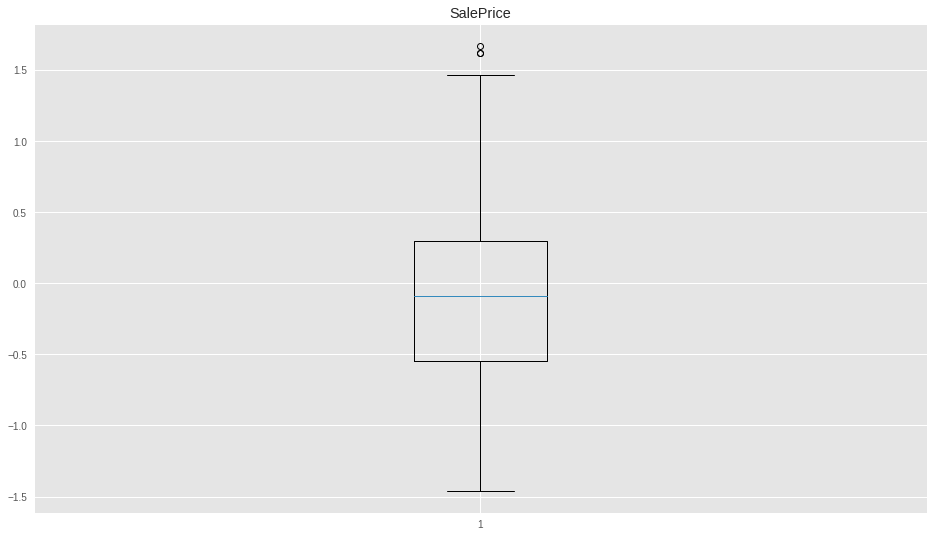

In [6]:
columns = []
for col in entrenamiento.columns:
    columns.append(col)
    
for columna in columns:
    Q1 = entrenamiento[columna].quantile(0.25)
    Q3 = entrenamiento[columna].quantile(0.75)
    IQR = Q3 - Q1

    indexes = entrenamiento[entrenamiento[columna] < (Q1 - 1.5 * IQR)].index
    entrenamiento.drop(indexes, inplace=True)

    indexes = entrenamiento[entrenamiento[columna] > (Q3 + 1.5 * IQR)].index
    entrenamiento.drop(indexes, inplace=True)
    
    plt.boxplot(entrenamiento[columna])
    plt.title(columna)
    plt.show()

### 2) Creacion de la variable categórica que especifica si la casa es barata, media o cara

In [7]:
kmeans = cluster.KMeans(n_clusters = 3)
X = np.array(entrenamiento[["SalePrice", "OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", "GarageYrBlt", "GarageCars", "GarageArea"]])
X = sklearn.preprocessing.scale(X)
kmeans.fit(X)
entrenamiento['KmeansCluster'] = kmeans.labels_

In [8]:
X = entrenamiento[["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", 
                   "GarageYrBlt", "GarageCars", "GarageArea"]]
y = entrenamiento["KmeansCluster"]

### Separando en Train y Test

In [9]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

## Incisos del 3 al 5, Creando módelo, Predicción de cada uno, Matrices de confusión, Comparación

### lbfgs y activación relu

In [10]:
mlp = MLPClassifier(hidden_layer_sizes=(10,8), solver = "lbfgs", max_iter=1000)
start = time.time()
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
end = time.time()
y_pred

array([1, 1, 1, 0, 2, 1, 2, 1, 1, 2, 0, 1, 0, 1, 0, 2, 0, 2, 2, 2, 0, 1,
       2, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2, 1, 1, 2,
       2, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 2, 0, 0, 2, 0, 1, 0, 0,
       2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0,
       1, 2, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1,
       0, 2, 2], dtype=int32)

In [11]:
cm = Confusion_Matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión\n',cm)
print('Accuracy: ',accuracy)
print('Tiempo de ejecucion: ' + str(round((end - start), 4)))

Matriz de confusión
 [[51  2  0]
 [ 0 29  0]
 [ 0  1 30]]
Accuracy:  0.9734513274336283
Tiempo de ejecucion: 0.0144


### Matriz de Confusión

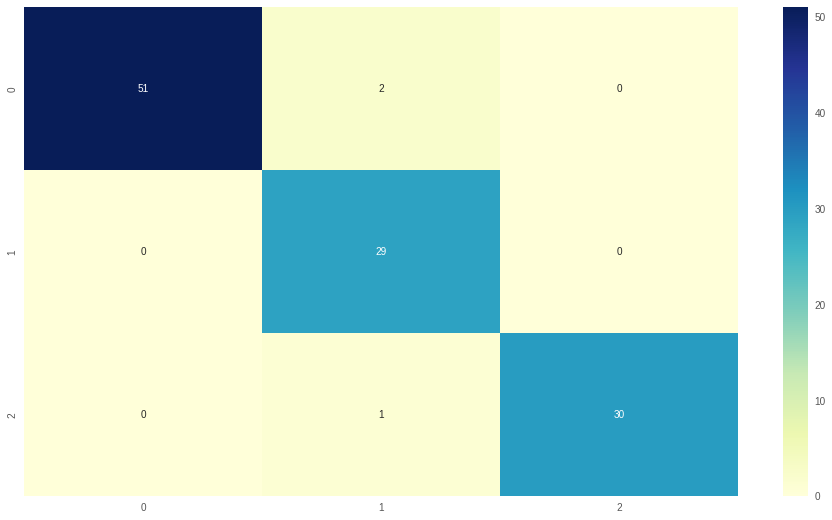

In [12]:
sb.heatmap(cm, annot=True, cmap="YlGnBu")
plt.show()

### adam y activación tanh

In [13]:
mlp = MLPClassifier(hidden_layer_sizes=(10,8), activation="tanh" , solver = "adam", max_iter=1000)
start = time.time()
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
end = time.time()
y_pred

array([1, 1, 1, 0, 2, 1, 2, 1, 1, 2, 0, 1, 0, 1, 0, 2, 0, 2, 2, 2, 0, 1,
       2, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 2,
       2, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 2, 0, 0, 2, 0, 1, 0, 0,
       2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0,
       1, 2, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1,
       0, 2, 2], dtype=int32)

In [14]:
cm = Confusion_Matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión\n',cm)
print('Accuracy: ',accuracy)
print('Tiempo de ejecucion: ' + str(round((end - start), 4)))

Matriz de confusión
 [[52  1  0]
 [ 0 29  0]
 [ 0  1 30]]
Accuracy:  0.9823008849557522
Tiempo de ejecucion: 0.5268


### Matriz de Confusión

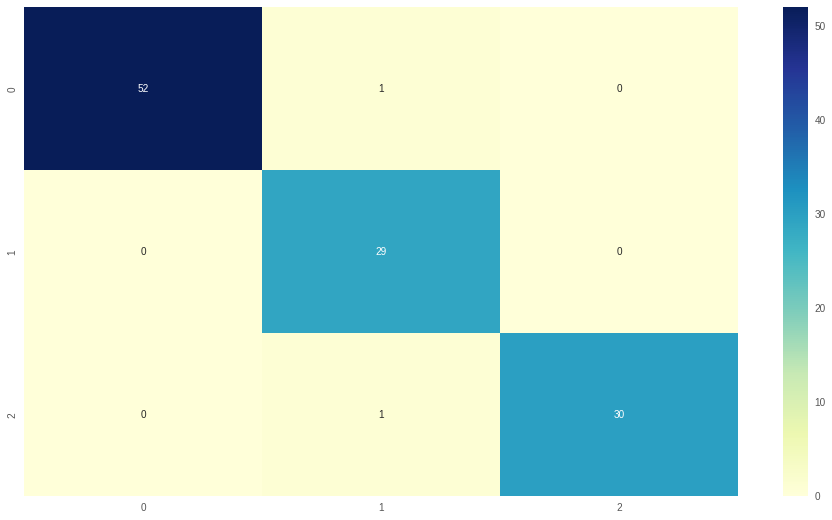

In [15]:
sb.heatmap(cm, annot=True, cmap="YlGnBu")
plt.show()

## 6) Comparación

In [16]:
topology = ["lbfgs", "adam"]
activations = ["relu", "tanh"]
accuracies = ["0.9911504424778761", "0.9557522123893806"] 
times = ["0.0399", "1.1561"]
errors = ["1", "5"]

d = {'Topología': topology, 'Modo de activación': activations, 'Precision': accuracies, 'Tiempo de ejecucion': times, 'Errores': errors}
df = pd.DataFrame(data=d)
pd.options.display.max_colwidth = 100
df

,Topología,Modo de activación,Precision,Tiempo de ejecucion,Errores
0,lbfgs,relu,0.9911504424778761,0.0399,1
1,adam,tanh,0.9557522123893806,1.1561,5


Podemos ver que utilizar un modelo de RNA basado en la topología lbfgs y modo de activación relu, nos da una efectividad de casi el 100% mientras que utilizano la topología adam y tanh, el resultado es de 0.95 en mucho mayor tiempo, por lo que en efectividad, equivocación gana el primer modelo. La importancia de los errores en este caso, es que predijo casas que pertenecieran a dos grupos al mismo tiempo(economicas, medias, caras) lo cual no es posible porque tienen que pertenecer estrictamente a un grupo para que esta puedan pertener a la variable categorica. 

## 7. Seleccione ahora el SalesPrice como variable respuesta.

In [66]:
X = entrenamiento[["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", 
                   "GarageYrBlt", "GarageCars", "GarageArea"]]
y = entrenamiento["SalePrice"]

In [68]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

## 8. Genere  dos  modelos  de  regresión  con  redes  neuronales  con  diferentes  topologías  y funciones de activación para predecir el precio de las casas.

### lbfgs y activación relu

In [94]:
mlp = MLPRegressor(hidden_layer_sizes=(10,8), solver = "lbfgs", max_iter=1000)
start = time.time()
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
end = time.time()
t1 = end - start
y_pred

/home/walt/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


array([ 0.50046996,  0.35573596,  0.23179117,  0.10031987, -0.4381497 ,
       -0.66365149, -0.80431621, -0.76940888, -0.66110005,  0.34325082,
        0.28073239, -0.89857792, -0.20030995,  0.5837259 , -0.42226345,
       -0.04412664, -0.3255333 ,  1.11931909,  0.90663309,  0.08034495,
        0.4626985 ,  0.29959935, -0.50553711,  1.01942721,  0.0584049 ,
        0.80833094,  0.16272348, -0.48849875,  0.30215861,  0.52422144,
        0.00620735,  0.01983068, -0.60550907,  0.20451181,  0.20444451,
        1.42633089, -0.79510971,  0.88998097, -0.70269906,  0.37911787,
       -0.48580157,  0.86655219,  0.08368821,  0.20074478,  0.22767798,
       -1.1637444 , -0.0247821 ,  1.06927656, -0.71306717,  0.31337361,
       -0.06517157, -0.25753056,  0.19206633,  0.58602656,  0.19209823,
       -0.21695969, -0.67412788, -0.17620589, -0.15059917,  1.02198306,
       -0.00254411, -0.11864433, -0.27806681, -0.88951619, -0.04603844,
       -0.36338102,  0.21566048,  1.14664793, -0.99193361,  0.30

#### Score del modelo

In [95]:
s1 = r2_score(y_test, y_pred)
s1

0.6526861350395324

### adam y activación tanh

In [96]:
mlp = MLPRegressor(hidden_layer_sizes=(10,8), activation="tanh" , solver = "adam", max_iter=1000)
start = time.time()
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
end = time.time()
t2 = end - start
y_pred

array([ 0.49918084,  0.31693663,  0.2277469 ,  0.12184389, -0.6104673 ,
       -0.74729584, -0.68652431, -0.81853107, -0.79628954,  0.28642641,
        0.46093057, -0.78139403, -0.55414977, -0.05398519, -0.13273492,
       -0.22680329, -0.24310076,  0.65761899,  0.89684245,  0.33748535,
        0.35392076,  0.21640362, -0.95964336,  0.71634758, -0.28560326,
        0.58321448,  0.31369265, -0.51049214,  0.38857056,  0.90858066,
        0.14951617,  0.01505034, -0.6724114 ,  0.01080862,  0.40101956,
        0.93703326, -0.83683053,  0.98802238, -0.74591833, -0.34306795,
       -0.26689285,  0.97317102,  0.11345232,  0.45070142,  0.31833495,
       -1.12402844, -0.07453767,  0.63742874, -0.80609143,  0.30537125,
       -0.22560523, -0.26887665,  0.3166937 ,  0.22232358,  0.24981784,
       -0.17373217, -0.40195999,  0.03818844,  0.0701295 ,  0.72656167,
        0.13355535, -0.22179424, -0.40507949, -0.88987866, -0.21778636,
       -0.40907069,  0.26604949,  1.07803744, -0.89364779,  0.24

#### Score del modelo

In [97]:
s2 = r2_score(y_test, y_pred)
s2

0.7605581181376021

## 9. Compare  los  dos  modelos  de  regresión  y  determine  cuál  funcionó  mejor  para  predecir  el precio de las casas.

In [98]:
topology = ["lbfgs", "adam"]
activations = ["relu", "tanh"]
scores = [s1, s2] 
times = [t1, t2]

d = {'Topología': topology, 'Modo de activación': activations, 'Score': scores, 'Tiempo de ejecucion': times}
df = pd.DataFrame(data=d)
pd.options.display.max_colwidth = 100
df

,Topología,Modo de activación,Score,Tiempo de ejecucion
0,lbfgs,relu,0.652686,0.339789
1,adam,tanh,0.760558,0.088194


Podemos ver que el modelo de adam+tanh fue el que funcionó mejor en comparación al lbfgs+relu, pues su precisión es de apoximadamente un 10% mejor, y lo más significativo es el tiempo de ejecución, que lo supera por 0.3 segundos.

## 10. Compare  la  eficiencia  del  mejor  modelo  de  RNA  con  los  resultados  obtenidos  con  los algoritmos  de  las  hojas  de  trabajo  anteriores.  ¿Cuál  es  mejor  para  predecir?  ¿Cuál  se demoró más en procesar?

Hay una diferencia muy signidicativa entre RNA con el resto de algoritmos utilizados en hojas anteriores, pues la precisión de RNA es mucho mejor que el resto, los cuales suelen estar por encima del 85% mientras que el presente no supera el 80% en ninguna de las pruebas realizadas. Pero, la ventaja de RNA que supera a todos los demás es el tiempo de ejecución por mucho, pues los otros superan 1 segundo de ejecución, pero este no llega ni al medio segundo en ejecución.

Por lo tanto, podemos decir que cualquiera de los algoritmos anteriores es mejor para predecir que el RNA (entre los otros algoritmos no hay diferencia significativa en precisión para decir cuál es el mejor). Pero en tiempo de ejecución el RNA es superior a cualquiera, el que más se demoró en ejecutar es el árbol de decisiones.

(Los resultados son presentados con más detalle en el inciso 13)

## 11. Compare los resultados del mejor modelo de esta hoja para clasificar con los resultados de los algoritmos usados para clasificar de las hojas de trabajo anteriores

La precisión de todos los algoritmos de clasificación está por encima del 90%, por lo cual no hay suficiente información para decir que un algoritmo es significativamente mejor que otro, deberían de realizarse más pruebas con mayores cantidades de datos de diferentes distribuciones para ser más concluyente. Sin embargo, donde si existe una diferenciación significatica es en los tiempos de ejecución, RNA supera por mucho a todos los algoritmos cuando se utiliza lbfgs+relu, con un tiempo menor a 0.1 segundos, aunque para adam+tanh el tiempo es muy similar al resto de algoritmos.

(Los resultados son presentados con más detalle en el inciso 13)

## 12. Compare  los  resultados  del  mejor  modelo  para  predecir  el  precio  de  venta  con  los resultados  de  los  algoritmos  usados  para  el  mismo  propósito  de  las  hojas  de  trabajo anteriores.

El algoritmo que mejor realizó predicciones son los árboles de decisión, con precisión del 100%, lo cual es muchísimo mejor en rendimiento en comparación al RNA que tuvo los resultados de precisión más bajos en comparación a todos los demás algoritmos, literalmente es comparar el mejor con el peor algoritmo en precisión. Los tiemps de ejecución si son mucho mejores en RNA, con un margen de alrededor 1 segundo.

(Los resultados son presentados con más detalle en el inciso 13)

## 13. Genere un informe de los resultados y las explicaciones.

### HDT-7 - Redes neuronales

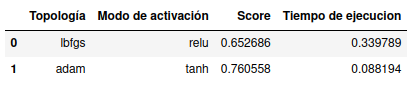

Este es el algoritmo más rápido de todos, los tiempos de ejecución son menores a los 0.5 segudnos aunque el score es el más bajo de todos los demás.

### HDT-6 - Regresión logística

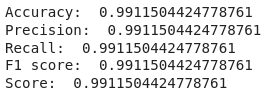

El el algoritmo de regresión logística fue muy preciso y obtuvo buenos resultados en un tiempo bastante aceptable y dentro del rango del promedio en comparación de los demás algoritmos.

### HDT-5 - Redes Bayesianas

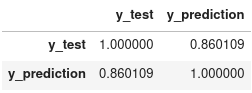

Este es de los algoritmos más bajos en precisión, pero es aceptable considerando que queda por encima del 85%, y no llega a ser el peor de todos. Los tiempos de ejecución son un poco elevados en comparación al resto.

### HDT-4 - Modelos de regresion lineal

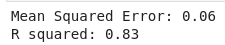

Los resultados de este algoritmo también son muy similares al anterior tanto en precisión como en tiempo de ejecución, aunque un poco por debajo en rendimiento en general.

### HDT-3 - Árboles de Decisión

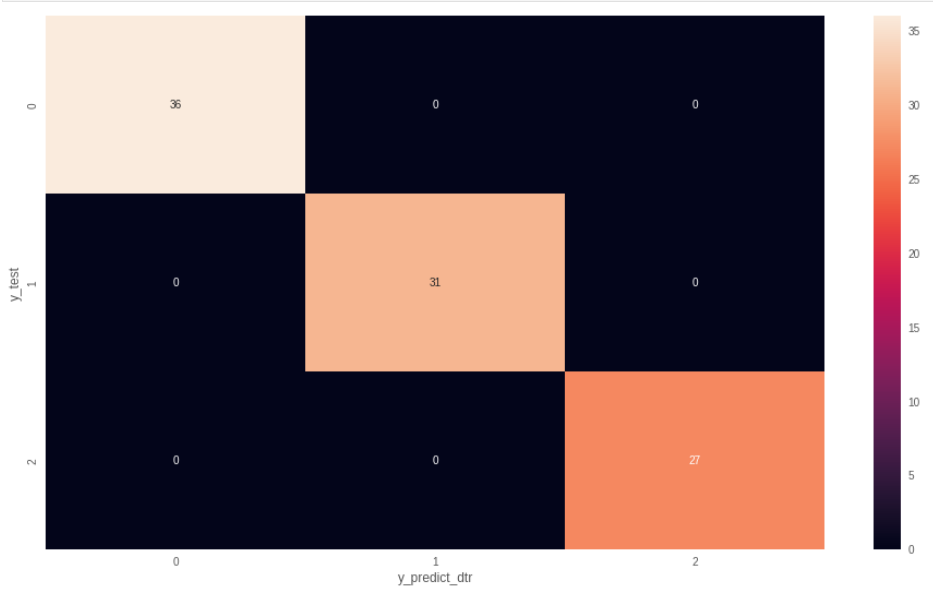

Este algoritmo fue el más preciso de todos, no obtuvo ningún error en las predicciones, dando una precisión del 100%, y con tiempos de ejecución aceptables dentro del margen promedio.